In [2]:
import itertools
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path 
import os
import sys
from IPython.display import clear_output
import logging
import threading
import time

In [3]:
YEARS = [str(year) for year in range(1990,2019)]

## Computer science authors in France
collaboration_df = pd.read_csv('myDATA/00-collaboration_df.csv')

In [4]:
collaboration_df

,ID,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,8958327900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6508297663,0,0,0,0,0,0,0,0,0,...,4,7,7,8,8,8,8,8,8,8
2,7004267341,0,0,0,0,0,0,0,0,0,...,10,10,10,16,16,16,16,16,16,16
3,8642393600,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,7,7,7
4,55873955900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232833,6507630481,0,0,0,0,0,0,0,0,0,...,18,18,18,18,18,29,29,29,29,29
232834,24577815500,0,0,0,0,0,0,0,0,0,...,4,4,4,4,6,13,16,16,16,70
232835,57195243976,0,0,0,0,0,0,0,0,0,...,0,3,3,3,3,3,3,3,8,8
232836,35328962100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,3


In [6]:
## Find the starting collaboration year for each author
def get_start_Y(df, id):
    aut = df.loc[df["ID"] == id]
    start_year = 0
    for year in aut.columns[1:]:
        n_colls = aut[year].values[0]
        if(n_colls != 0 and start_year==0):
            start_year = year
    return start_year

In [7]:
# Filter inactive authors: no holes of given lenght in publication history
def filter_inactives(df, hole_lenght): 
    
    i=0
    tot=len(df["ID"])
    
    for id in df["ID"]:
        aut = df.loc[df["ID"] == id]
        ID = aut["ID"].values[0]
        start_y = int(get_start_Y(df, id))
        active = True

        if(start_y == 0):
            active = False
        
        # slide the hole window 
        while(start_y + hole_lenght-1 < 2018):            
            c = 0
            for j in range(0, hole_lenght):
                if(aut[str(start_y + j)].values[0] == 0):
                    c += 1
            if(c>=hole_lenght-1):
                active = False
                
            start_y += 1
        
        if(active == False):
            df = df[df['ID'] != ID]

        clear_output(wait=True)
        
        print(i, "/", tot, "for hole_lenght", hole_lenght-1)
        i += 1       
        

    for i in df.index:
        df.loc[i].to_json()

    return df

In [11]:
hole_lenght = 28
min_hole_l = 0

In [ ]:
## filter out all inactive authors from the collaboration datasset, for different hole lenght
tmp_pub_df = publications_df
while(hole_lenght>min_hole_l):
          
    tmp_pub_df = filter_inactives(tmp_pub_df, hole_lenght)
    active_IDs = tmp_pub_df["ID"]
    
    df = collaboration_df[collaboration_df.ID.isin(active_IDs)]
    df.to_csv('myDATA/05-filtered_by_hole_size/filtered_by_hole_size_'+str(hole_lenght-1)+'.csv', index=False)
    
    hole_lenght-=1

In [ ]:
# remove empty authors
min_size = 0
max_size = 28
YEARS = [str(year) for year in range(1991,2019)]  

# Read active authors by hole lenght
for size in range(min_size, max_size+1):
    path = 'myDATA/05-filtered_by_hole_size/filtered_by_hole_size_'+str(size)+'.csv'
    df = pd.read_csv(path)
    
    ids = df.loc[df['2018'] == 0]['ID'].index.values
    df = df.drop(ids)
    df.to_csv(path, index=False)

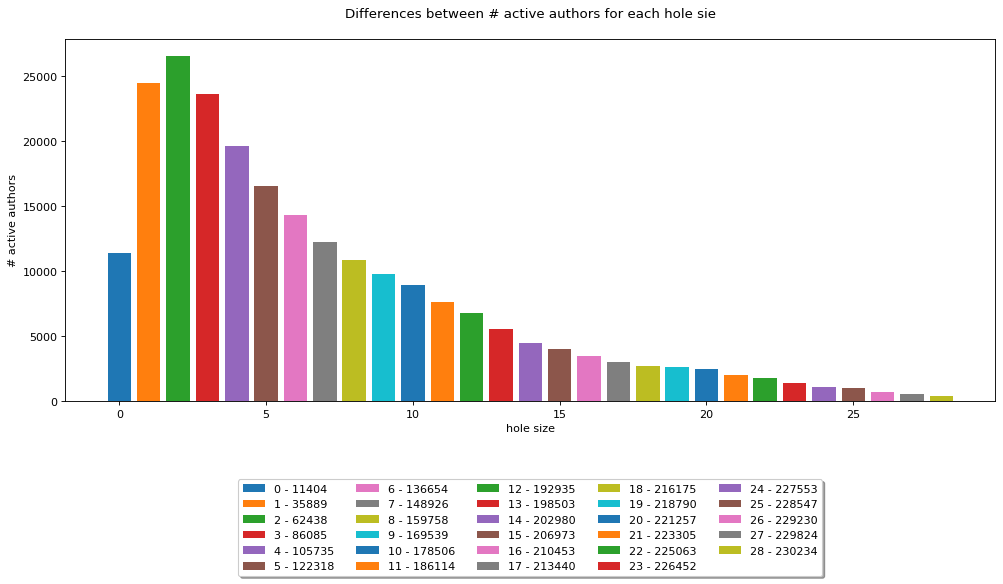

In [6]:
min_size = 0
max_size = 28
YEARS = [str(year) for year in range(1991,2019)]  

# read number of active authors for each hole size
numbers = []
legend = []

plt.figure(figsize=(15, 6), dpi=80)
plt.xlabel("hole size")
plt.ylabel("# active authors")
plt.title("Differences between # active authors for each hole sie\n", fontdict = {'fontsize' : 12})

last = 0
for size in range(min_size, max_size+1):
    path = 'myDATA/05-filtered_by_hole_size/filtered_by_hole_size_'+str(size)+'.csv'
    if os.path.exists(path):
        df = pd.read_csv(path)
        legend.append(str(size) + ' - ' + str(len(df)))
        plt.bar(size,len(df)-last)

        last = len(df)

plt.legend(legend,loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5)
plt.show()

================================================================ HOLE SIZE 0 =================================================================


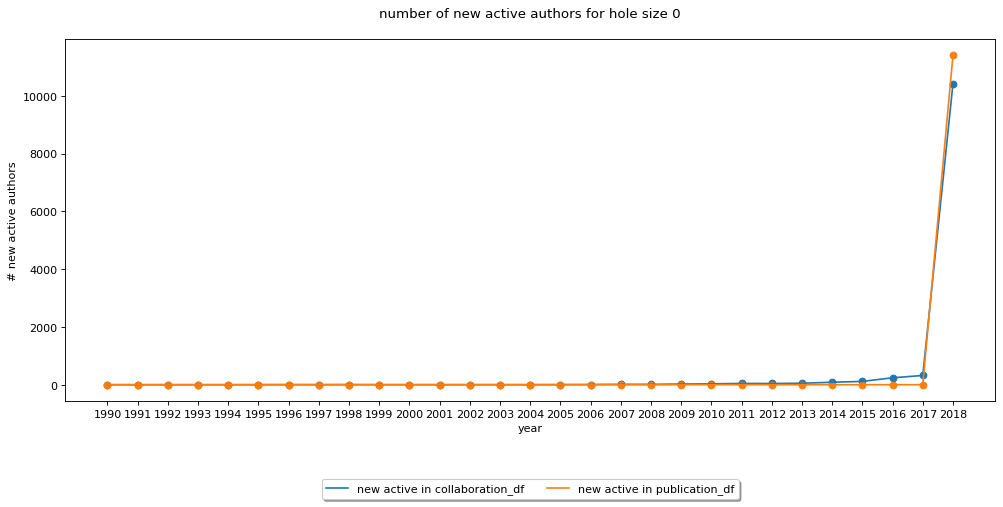

collaboration_df {'1990': '0', '1991': '0', '1992': '0', '1993': '0', '1994': '0', '1995': '1', '1996': '3', '1997': '2', '1998': '4', '1999': '1', '2000': '1', '2001': '1', '2002': '1', '2003': '1', '2004': '1', '2005': '3', '2006': '6', '2007': '12', '2008': '11', '2009': '22', '2010': '30', '2011': '43', '2012': '42', '2013': '50', '2014': '85', '2015': '114', '2016': '239', '2017': '319', '2018': '10412'} 

publication_df {'1990': '0', '1991': '0', '1992': '0', '1993': '0', '1994': '0', '1995': '0', '1996': '0', '1997': '0', '1998': '0', '1999': '0', '2000': '0', '2001': '0', '2002': '0', '2003': '0', '2004': '0', '2005': '0', '2006': '0', '2007': '0', '2008': '0', '2009': '0', '2010': '0', '2011': '0', '2012': '0', '2013': '0', '2014': '0', '2015': '0', '2016': '0', '2017': '0', '2018': '11404'}
================================================================ HOLE SIZE 1 =================================================================


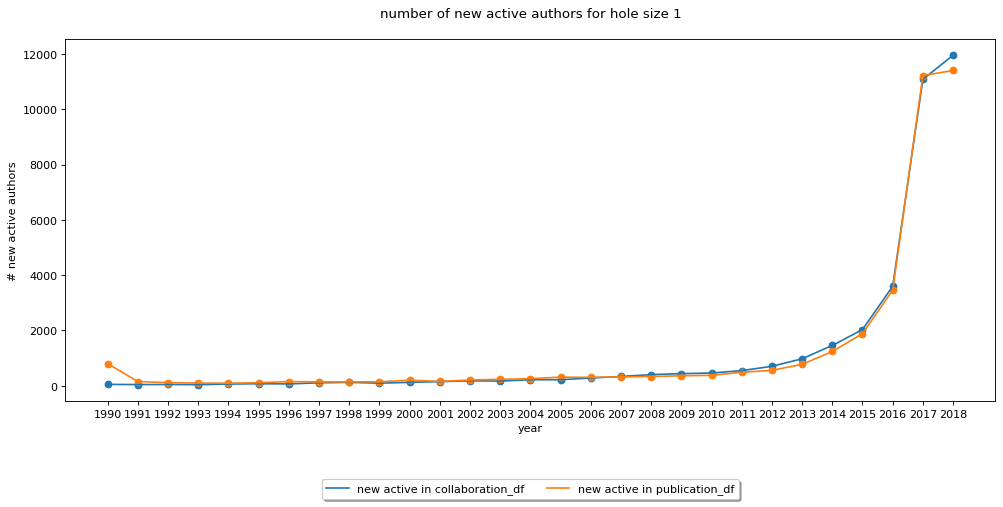

collaboration_df {'1990': '45', '1991': '38', '1992': '41', '1993': '33', '1994': '57', '1995': '67', '1996': '61', '1997': '101', '1998': '117', '1999': '89', '2000': '117', '2001': '144', '2002': '172', '2003': '164', '2004': '212', '2005': '214', '2006': '274', '2007': '331', '2008': '398', '2009': '433', '2010': '455', '2011': '543', '2012': '698', '2013': '971', '2014': '1454', '2015': '2028', '2016': '3594', '2017': '11083', '2018': '11955'} 

publication_df {'1990': '795', '1991': '147', '1992': '108', '1993': '91', '1994': '87', '1995': '103', '1996': '147', '1997': '133', '1998': '134', '1999': '138', '2000': '195', '2001': '154', '2002': '203', '2003': '229', '2004': '252', '2005': '307', '2006': '300', '2007': '315', '2008': '328', '2009': '355', '2010': '372', '2011': '481', '2012': '553', '2013': '769', '2014': '1235', '2015': '1881', '2016': '3453', '2017': '11220', '2018': '11404'}
================================================================ HOLE SIZE 2 =============

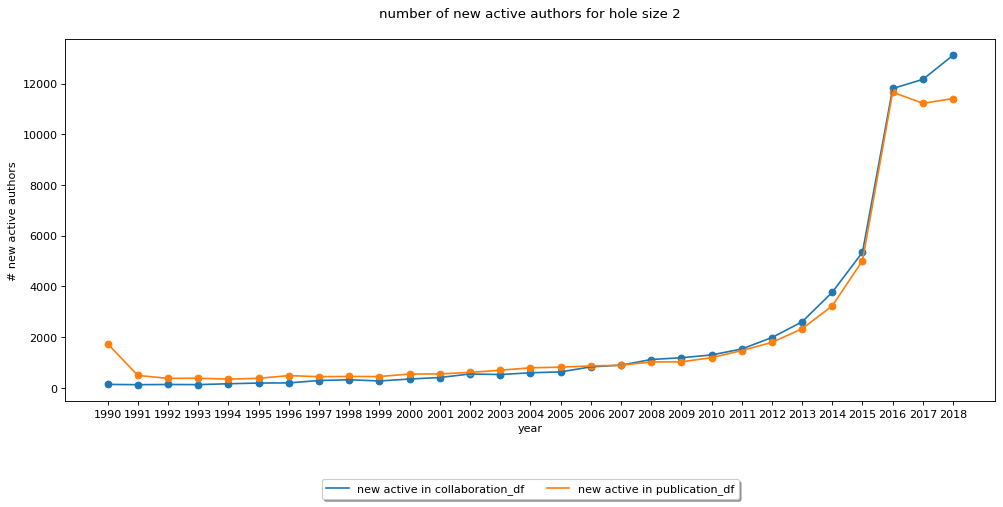

collaboration_df {'1990': '128', '1991': '116', '1992': '125', '1993': '119', '1994': '153', '1995': '181', '1996': '187', '1997': '281', '1998': '311', '1999': '263', '2000': '340', '2001': '399', '2002': '538', '2003': '517', '2004': '586', '2005': '621', '2006': '819', '2007': '887', '2008': '1110', '2009': '1180', '2010': '1290', '2011': '1524', '2012': '1976', '2013': '2597', '2014': '3766', '2015': '5341', '2016': '11804', '2017': '12163', '2018': '13116'} 

publication_df {'1990': '1732', '1991': '481', '1992': '365', '1993': '371', '1994': '336', '1995': '368', '1996': '474', '1997': '433', '1998': '440', '1999': '438', '2000': '537', '2001': '541', '2002': '601', '2003': '687', '2004': '781', '2005': '809', '2006': '858', '2007': '884', '2008': '1013', '2009': '1017', '2010': '1183', '2011': '1462', '2012': '1786', '2013': '2323', '2014': '3228', '2015': '5009', '2016': '11657', '2017': '11220', '2018': '11404'}
================================================================ 

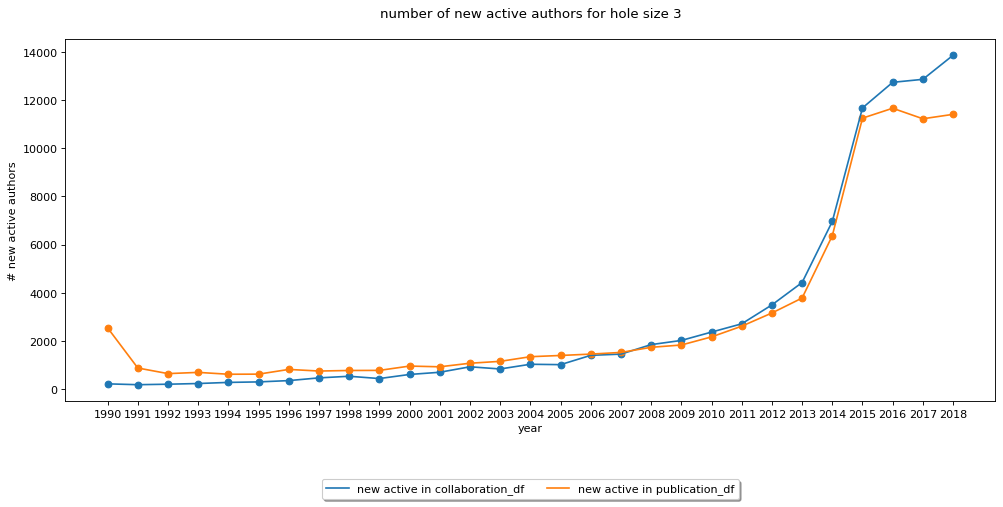

collaboration_df {'1990': '217', '1991': '182', '1992': '202', '1993': '231', '1994': '277', '1995': '298', '1996': '352', '1997': '465', '1998': '532', '1999': '437', '2000': '607', '2001': '698', '2002': '925', '2003': '835', '2004': '1030', '2005': '1014', '2006': '1400', '2007': '1451', '2008': '1846', '2009': '2019', '2010': '2366', '2011': '2709', '2012': '3494', '2013': '4423', '2014': '6957', '2015': '11671', '2016': '12733', '2017': '12857', '2018': '13857'} 

publication_df {'1990': '2541', '1991': '875', '1992': '642', '1993': '693', '1994': '616', '1995': '620', '1996': '816', '1997': '749', '1998': '772', '1999': '776', '2000': '955', '2001': '925', '2002': '1073', '2003': '1151', '2004': '1344', '2005': '1395', '2006': '1452', '2007': '1521', '2008': '1734', '2009': '1829', '2010': '2166', '2011': '2610', '2012': '3158', '2013': '3779', '2014': '6366', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
=====================================================

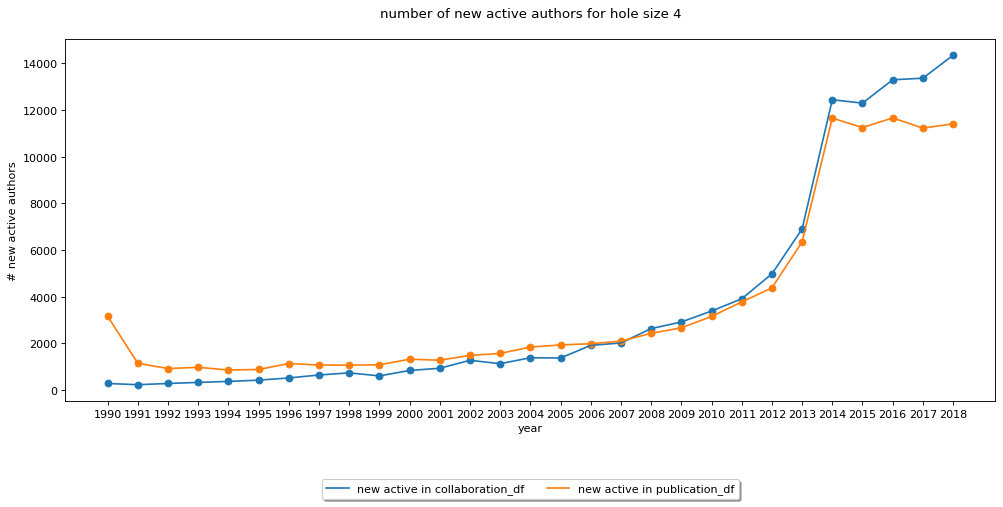

collaboration_df {'1990': '282', '1991': '230', '1992': '282', '1993': '328', '1994': '371', '1995': '425', '1996': '519', '1997': '645', '1998': '737', '1999': '607', '2000': '839', '2001': '935', '2002': '1275', '2003': '1130', '2004': '1384', '2005': '1374', '2006': '1914', '2007': '2018', '2008': '2633', '2009': '2916', '2010': '3385', '2011': '3910', '2012': '4977', '2013': '6900', '2014': '12437', '2015': '12290', '2016': '13291', '2017': '13359', '2018': '14342'} 

publication_df {'1990': '3161', '1991': '1148', '1992': '921', '1993': '974', '1994': '860', '1995': '882', '1996': '1136', '1997': '1072', '1998': '1067', '1999': '1082', '2000': '1321', '2001': '1280', '2002': '1485', '2003': '1571', '2004': '1841', '2005': '1934', '2006': '1985', '2007': '2094', '2008': '2431', '2009': '2668', '2010': '3152', '2011': '3773', '2012': '4377', '2013': '6344', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
==========================================

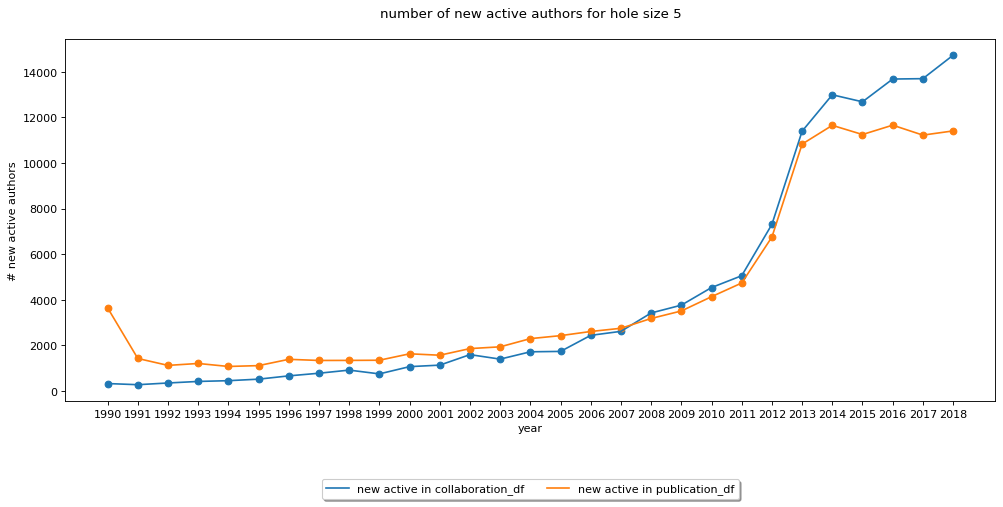

collaboration_df {'1990': '322', '1991': '272', '1992': '347', '1993': '415', '1994': '448', '1995': '515', '1996': '659', '1997': '775', '1998': '912', '1999': '746', '2000': '1064', '2001': '1130', '2002': '1591', '2003': '1394', '2004': '1715', '2005': '1732', '2006': '2437', '2007': '2612', '2008': '3418', '2009': '3761', '2010': '4533', '2011': '5052', '2012': '7305', '2013': '11392', '2014': '12989', '2015': '12681', '2016': '13680', '2017': '13697', '2018': '14724'} 

publication_df {'1990': '3641', '1991': '1422', '1992': '1119', '1993': '1203', '1994': '1072', '1995': '1109', '1996': '1385', '1997': '1335', '1998': '1338', '1999': '1345', '2000': '1627', '2001': '1565', '2002': '1856', '2003': '1933', '2004': '2293', '2005': '2424', '2006': '2606', '2007': '2747', '2008': '3177', '2009': '3506', '2010': '4132', '2011': '4733', '2012': '6748', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
==================================

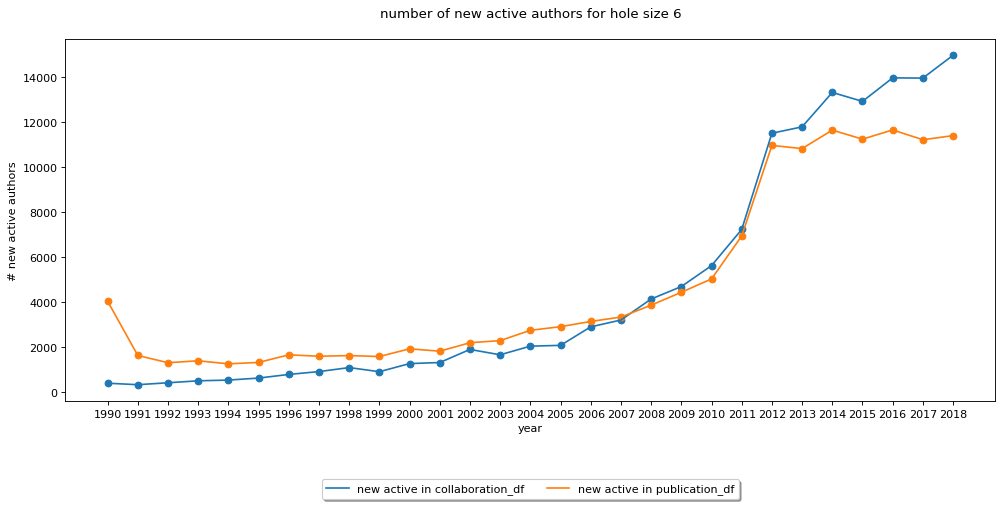

collaboration_df {'1990': '375', '1991': '309', '1992': '395', '1993': '482', '1994': '515', '1995': '604', '1996': '766', '1997': '893', '1998': '1071', '1999': '888', '2000': '1249', '2001': '1297', '2002': '1879', '2003': '1641', '2004': '2026', '2005': '2061', '2006': '2886', '2007': '3190', '2008': '4125', '2009': '4680', '2010': '5612', '2011': '7224', '2012': '11510', '2013': '11794', '2014': '13327', '2015': '12929', '2016': '13976', '2017': '13966', '2018': '14984'} 

publication_df {'1990': '4025', '1991': '1611', '1992': '1288', '1993': '1374', '1994': '1238', '1995': '1301', '1996': '1639', '1997': '1577', '1998': '1605', '1999': '1565', '2000': '1907', '2001': '1802', '2002': '2179', '2003': '2273', '2004': '2731', '2005': '2894', '2006': '3126', '2007': '3321', '2008': '3851', '2009': '4426', '2010': '5020', '2011': '6932', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
===============================

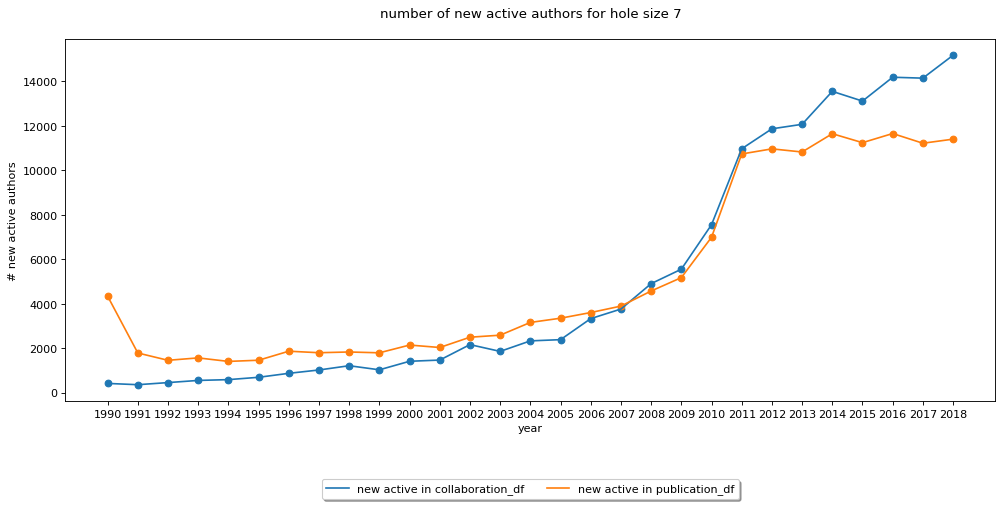

collaboration_df {'1990': '411', '1991': '354', '1992': '449', '1993': '546', '1994': '582', '1995': '687', '1996': '866', '1997': '1016', '1998': '1208', '1999': '1024', '2000': '1408', '2001': '1462', '2002': '2158', '2003': '1853', '2004': '2326', '2005': '2381', '2006': '3328', '2007': '3758', '2008': '4902', '2009': '5551', '2010': '7553', '2011': '10971', '2012': '11869', '2013': '12072', '2014': '13555', '2015': '13117', '2016': '14190', '2017': '14149', '2018': '15180'} 

publication_df {'1990': '4338', '1991': '1781', '1992': '1452', '1993': '1560', '1994': '1402', '1995': '1455', '1996': '1861', '1997': '1793', '1998': '1826', '1999': '1789', '2000': '2138', '2001': '2028', '2002': '2491', '2003': '2582', '2004': '3156', '2005': '3346', '2006': '3601', '2007': '3891', '2008': '4570', '2009': '5172', '2010': '6988', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
===========================

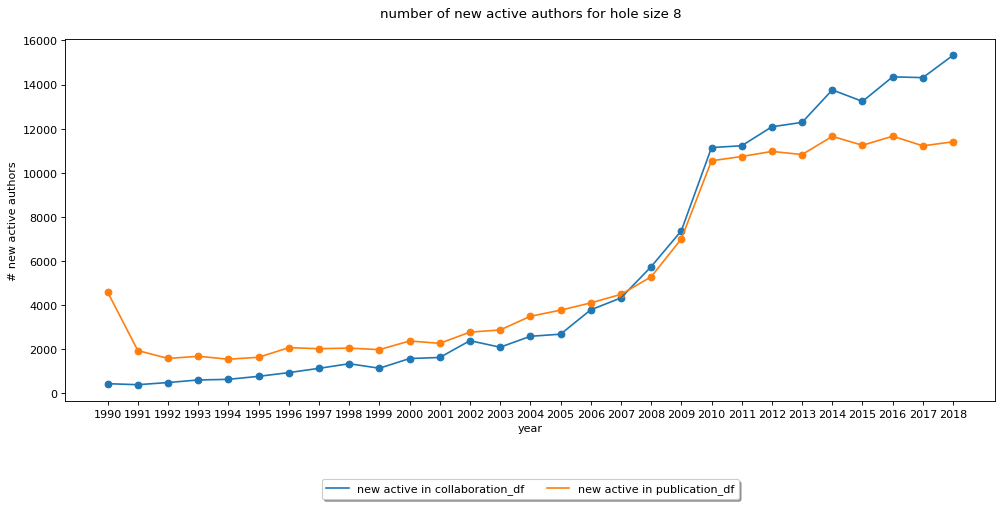

collaboration_df {'1990': '437', '1991': '391', '1992': '489', '1993': '605', '1994': '634', '1995': '770', '1996': '938', '1997': '1133', '1998': '1342', '1999': '1137', '2000': '1577', '2001': '1625', '2002': '2387', '2003': '2090', '2004': '2586', '2005': '2681', '2006': '3785', '2007': '4325', '2008': '5741', '2009': '7368', '2010': '11142', '2011': '11224', '2012': '12085', '2013': '12284', '2014': '13756', '2015': '13236', '2016': '14349', '2017': '14313', '2018': '15328'} 

publication_df {'1990': '4591', '1991': '1939', '1992': '1582', '1993': '1679', '1994': '1547', '1995': '1634', '1996': '2070', '1997': '2023', '1998': '2050', '1999': '1981', '2000': '2372', '2001': '2267', '2002': '2774', '2003': '2872', '2004': '3492', '2005': '3770', '2006': '4099', '2007': '4486', '2008': '5281', '2009': '7000', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
=========================

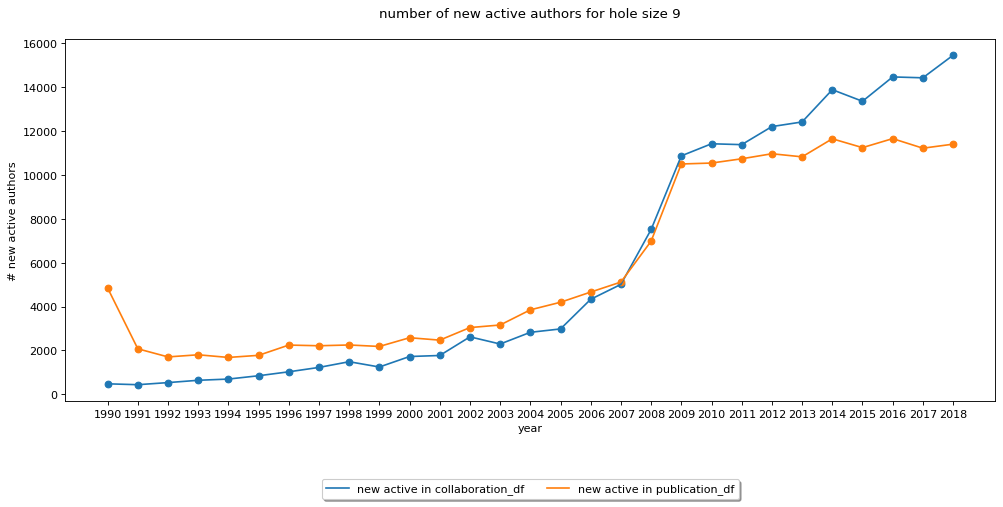

collaboration_df {'1990': '475', '1991': '435', '1992': '531', '1993': '636', '1994': '692', '1995': '843', '1996': '1023', '1997': '1223', '1998': '1483', '1999': '1242', '2000': '1720', '2001': '1767', '2002': '2617', '2003': '2290', '2004': '2824', '2005': '2978', '2006': '4331', '2007': '5010', '2008': '7514', '2009': '10871', '2010': '11422', '2011': '11382', '2012': '12206', '2013': '12417', '2014': '13888', '2015': '13360', '2016': '14470', '2017': '14430', '2018': '15459'} 

publication_df {'1990': '4844', '1991': '2072', '1992': '1702', '1993': '1799', '1994': '1678', '1995': '1774', '1996': '2242', '1997': '2211', '1998': '2246', '1999': '2179', '2000': '2577', '2001': '2467', '2002': '3040', '2003': '3157', '2004': '3849', '2005': '4195', '2006': '4660', '2007': '5116', '2008': '6982', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
======================

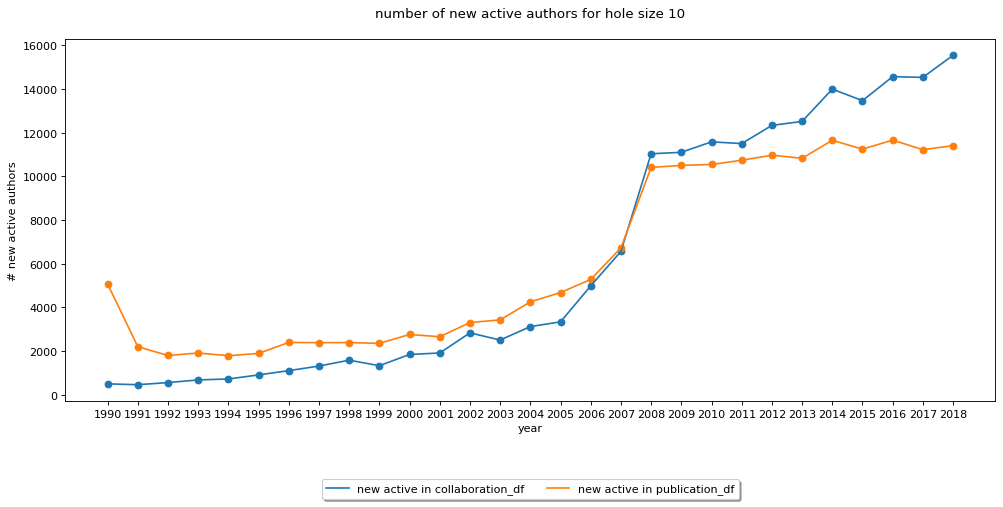

collaboration_df {'1990': '505', '1991': '467', '1992': '564', '1993': '686', '1994': '729', '1995': '915', '1996': '1111', '1997': '1320', '1998': '1588', '1999': '1337', '2000': '1850', '2001': '1918', '2002': '2839', '2003': '2510', '2004': '3127', '2005': '3342', '2006': '4991', '2007': '6565', '2008': '11033', '2009': '11100', '2010': '11578', '2011': '11499', '2012': '12331', '2013': '12514', '2014': '13992', '2015': '13463', '2016': '14563', '2017': '14528', '2018': '15541'} 

publication_df {'1990': '5073', '1991': '2206', '1992': '1803', '1993': '1917', '1994': '1793', '1995': '1898', '1996': '2401', '1997': '2390', '1998': '2395', '1999': '2357', '2000': '2765', '2001': '2662', '2002': '3310', '2003': '3432', '2004': '4256', '2005': '4684', '2006': '5283', '2007': '6723', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
====================

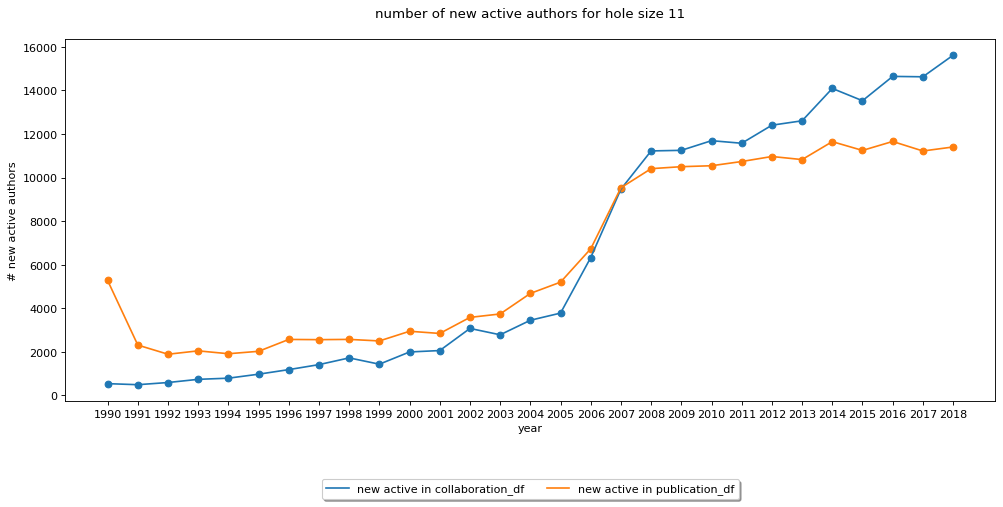

collaboration_df {'1990': '543', '1991': '495', '1992': '595', '1993': '741', '1994': '794', '1995': '977', '1996': '1187', '1997': '1416', '1998': '1725', '1999': '1436', '2000': '1997', '2001': '2062', '2002': '3077', '2003': '2785', '2004': '3452', '2005': '3781', '2006': '6330', '2007': '9470', '2008': '11223', '2009': '11250', '2010': '11693', '2011': '11575', '2012': '12404', '2013': '12606', '2014': '14091', '2015': '13527', '2016': '14643', '2017': '14625', '2018': '15614'} 

publication_df {'1990': '5278', '1991': '2313', '1992': '1893', '1993': '2048', '1994': '1916', '1995': '2027', '1996': '2572', '1997': '2562', '1998': '2574', '1999': '2503', '2000': '2947', '2001': '2847', '2002': '3584', '2003': '3741', '2004': '4684', '2005': '5201', '2006': '6732', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
====================

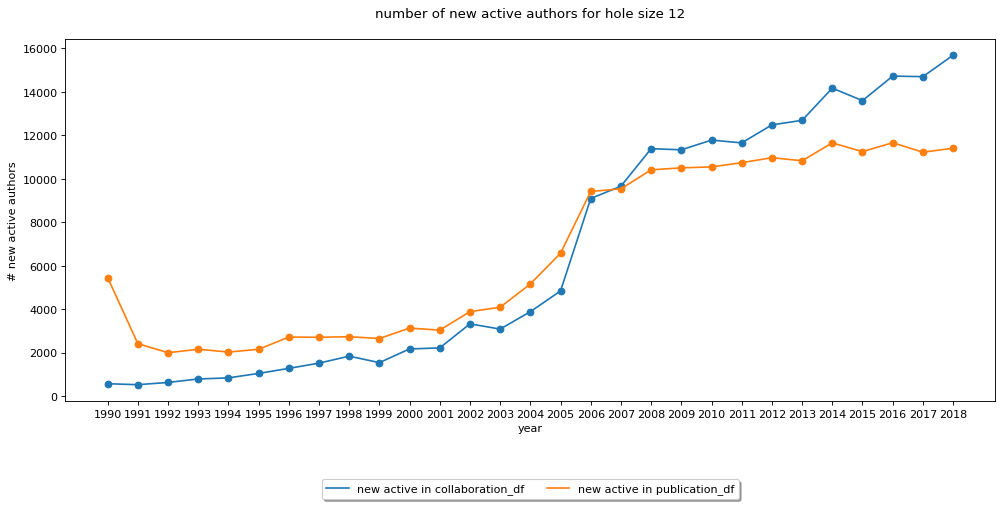

collaboration_df {'1990': '566', '1991': '521', '1992': '625', '1993': '784', '1994': '835', '1995': '1040', '1996': '1272', '1997': '1513', '1998': '1834', '1999': '1537', '2000': '2166', '2001': '2214', '2002': '3322', '2003': '3080', '2004': '3881', '2005': '4835', '2006': '9089', '2007': '9656', '2008': '11382', '2009': '11330', '2010': '11777', '2011': '11649', '2012': '12477', '2013': '12687', '2014': '14169', '2015': '13593', '2016': '14722', '2017': '14697', '2018': '15682'} 

publication_df {'1990': '5454', '1991': '2411', '1992': '1993', '1993': '2153', '1994': '2023', '1995': '2150', '1996': '2713', '1997': '2703', '1998': '2729', '1999': '2646', '2000': '3126', '2001': '3032', '2002': '3883', '2003': '4086', '2004': '5156', '2005': '6573', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
===================

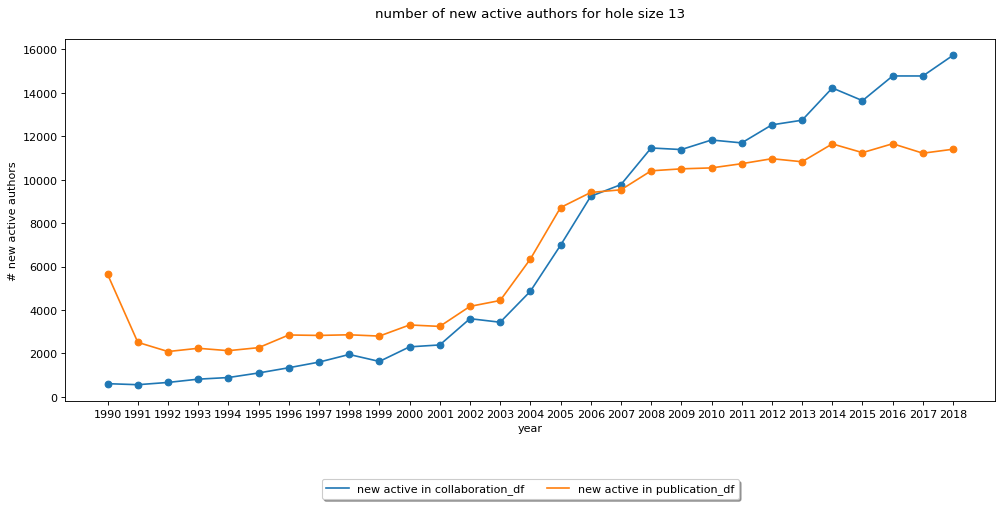

collaboration_df {'1990': '605', '1991': '558', '1992': '662', '1993': '813', '1994': '888', '1995': '1098', '1996': '1339', '1997': '1598', '1998': '1950', '1999': '1629', '2000': '2301', '2001': '2389', '2002': '3599', '2003': '3435', '2004': '4860', '2005': '6980', '2006': '9235', '2007': '9773', '2008': '11461', '2009': '11388', '2010': '11828', '2011': '11695', '2012': '12526', '2013': '12740', '2014': '14225', '2015': '13641', '2016': '14778', '2017': '14777', '2018': '15732'} 

publication_df {'1990': '5638', '1991': '2509', '1992': '2085', '1993': '2235', '1994': '2125', '1995': '2264', '1996': '2848', '1997': '2827', '1998': '2857', '1999': '2797', '2000': '3309', '2001': '3243', '2002': '4165', '2003': '4436', '2004': '6344', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
===================

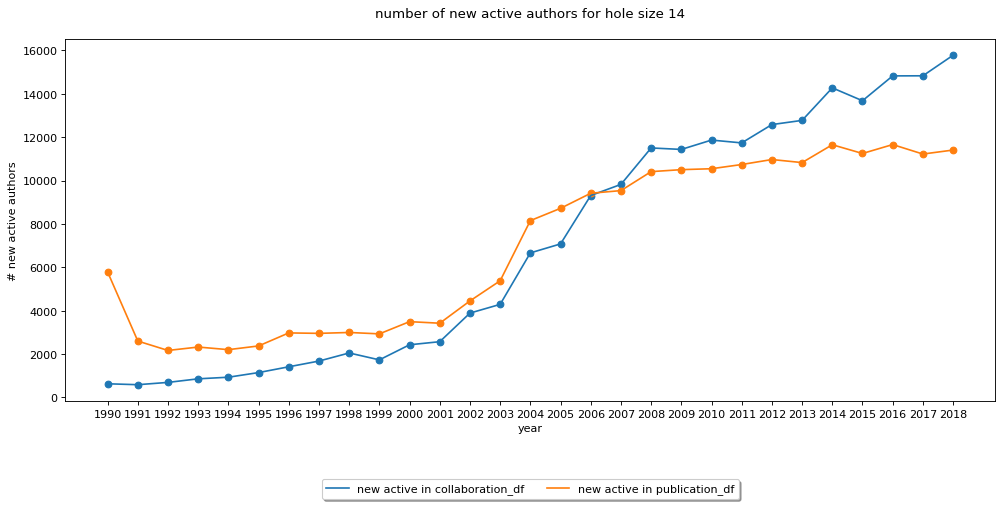

collaboration_df {'1990': '626', '1991': '584', '1992': '690', '1993': '855', '1994': '929', '1995': '1143', '1996': '1410', '1997': '1674', '1998': '2047', '1999': '1729', '2000': '2425', '2001': '2567', '2002': '3886', '2003': '4288', '2004': '6662', '2005': '7076', '2006': '9308', '2007': '9820', '2008': '11501', '2009': '11433', '2010': '11864', '2011': '11734', '2012': '12579', '2013': '12772', '2014': '14272', '2015': '13678', '2016': '14824', '2017': '14828', '2018': '15776'} 

publication_df {'1990': '5783', '1991': '2596', '1992': '2163', '1993': '2320', '1994': '2200', '1995': '2371', '1996': '2972', '1997': '2951', '1998': '2992', '1999': '2928', '2000': '3491', '2001': '3419', '2002': '4447', '2003': '5376', '2004': '8150', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
===================

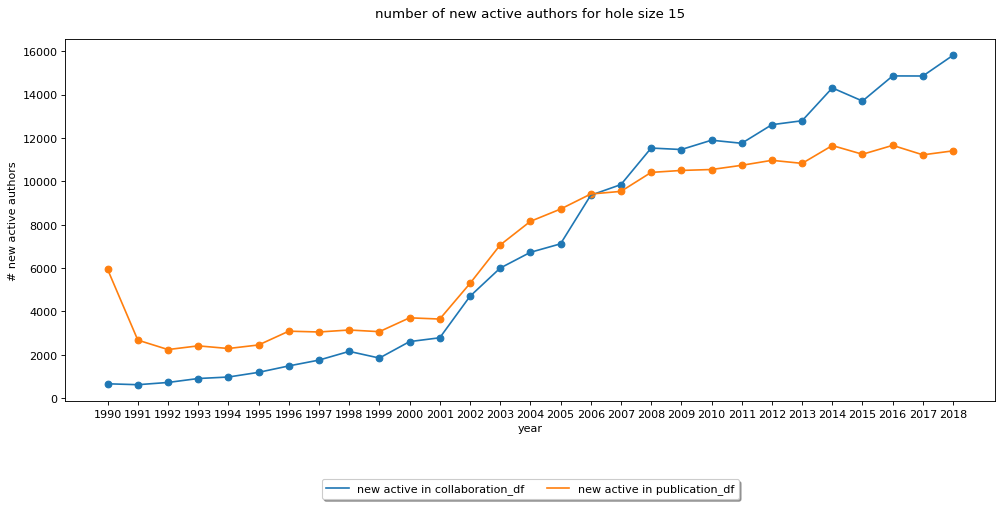

collaboration_df {'1990': '657', '1991': '615', '1992': '718', '1993': '900', '1994': '969', '1995': '1185', '1996': '1481', '1997': '1750', '1998': '2152', '1999': '1844', '2000': '2603', '2001': '2780', '2002': '4692', '2003': '5994', '2004': '6722', '2005': '7114', '2006': '9356', '2007': '9848', '2008': '11533', '2009': '11465', '2010': '11895', '2011': '11753', '2012': '12611', '2013': '12793', '2014': '14308', '2015': '13702', '2016': '14861', '2017': '14857', '2018': '15815'} 

publication_df {'1990': '5934', '1991': '2672', '1992': '2236', '1993': '2407', '1994': '2285', '1995': '2448', '1996': '3084', '1997': '3047', '1998': '3138', '1999': '3062', '2000': '3700', '2001': '3644', '2002': '5285', '2003': '7060', '2004': '8150', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
===================

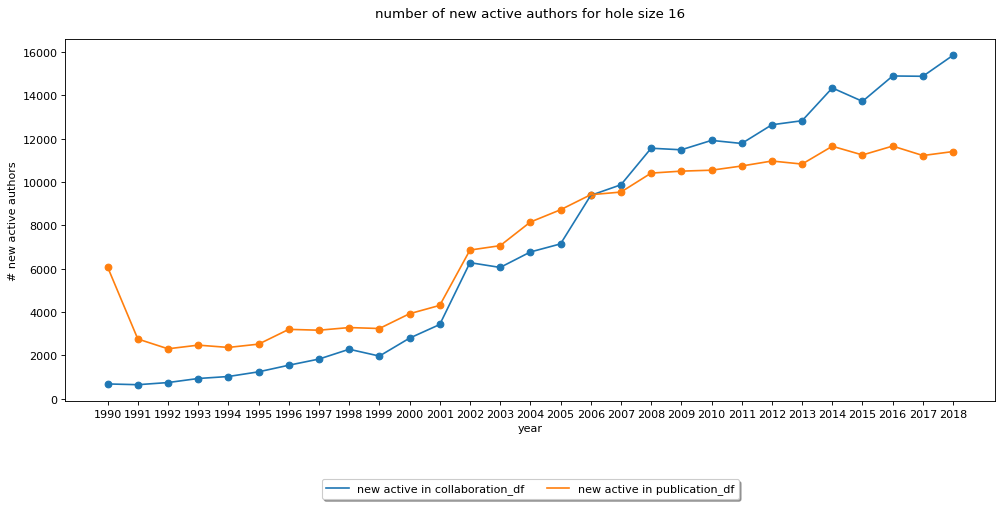

collaboration_df {'1990': '678', '1991': '643', '1992': '742', '1993': '929', '1994': '1021', '1995': '1237', '1996': '1542', '1997': '1826', '1998': '2279', '1999': '1964', '2000': '2792', '2001': '3422', '2002': '6276', '2003': '6055', '2004': '6768', '2005': '7142', '2006': '9381', '2007': '9871', '2008': '11557', '2009': '11485', '2010': '11919', '2011': '11777', '2012': '12640', '2013': '12827', '2014': '14340', '2015': '13721', '2016': '14892', '2017': '14878', '2018': '15849'} 

publication_df {'1990': '6072', '1991': '2752', '1992': '2300', '1993': '2469', '1994': '2363', '1995': '2515', '1996': '3197', '1997': '3158', '1998': '3280', '1999': '3236', '2000': '3919', '2001': '4304', '2002': '6857', '2003': '7060', '2004': '8150', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
==================

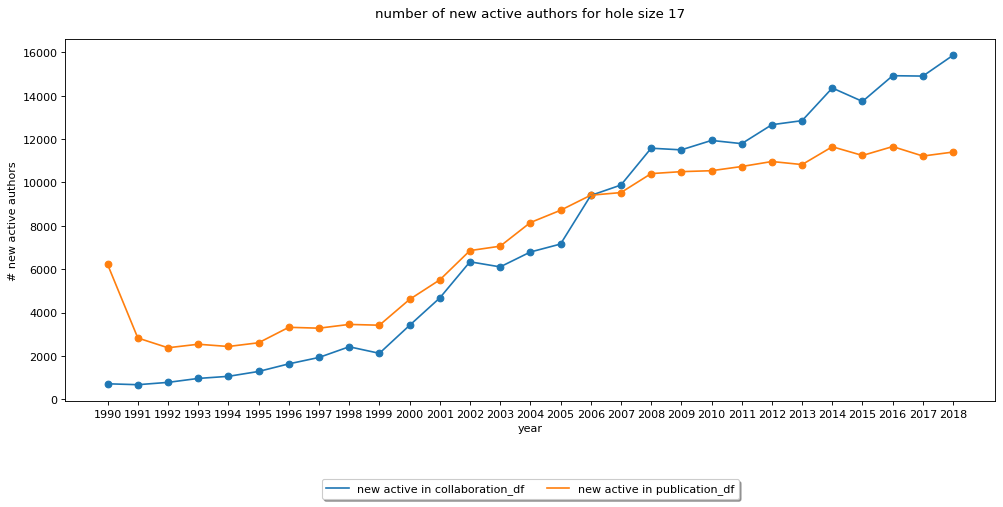

collaboration_df {'1990': '711', '1991': '669', '1992': '776', '1993': '958', '1994': '1055', '1995': '1280', '1996': '1630', '1997': '1926', '1998': '2419', '1999': '2117', '2000': '3407', '2001': '4671', '2002': '6340', '2003': '6105', '2004': '6791', '2005': '7159', '2006': '9400', '2007': '9882', '2008': '11581', '2009': '11505', '2010': '11940', '2011': '11792', '2012': '12666', '2013': '12853', '2014': '14360', '2015': '13740', '2016': '14927', '2017': '14909', '2018': '15871'} 

publication_df {'1990': '6216', '1991': '2824', '1992': '2373', '1993': '2536', '1994': '2432', '1995': '2604', '1996': '3317', '1997': '3277', '1998': '3450', '1999': '3414', '2000': '4604', '2001': '5505', '2002': '6857', '2003': '7060', '2004': '8150', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
==================

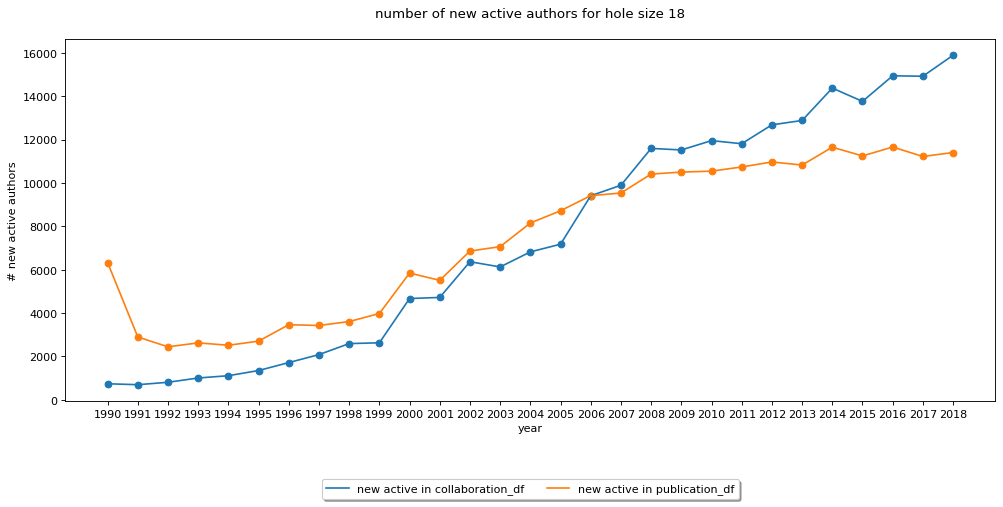

collaboration_df {'1990': '733', '1991': '690', '1992': '802', '1993': '999', '1994': '1105', '1995': '1344', '1996': '1711', '1997': '2079', '1998': '2587', '1999': '2623', '2000': '4666', '2001': '4717', '2002': '6364', '2003': '6124', '2004': '6818', '2005': '7173', '2006': '9409', '2007': '9892', '2008': '11593', '2009': '11522', '2010': '11952', '2011': '11810', '2012': '12681', '2013': '12882', '2014': '14377', '2015': '13763', '2016': '14944', '2017': '14923', '2018': '15892'} 

publication_df {'1990': '6323', '1991': '2891', '1992': '2438', '1993': '2620', '1994': '2510', '1995': '2700', '1996': '3459', '1997': '3422', '1998': '3604', '1999': '3974', '2000': '5841', '2001': '5505', '2002': '6857', '2003': '7060', '2004': '8150', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
==================

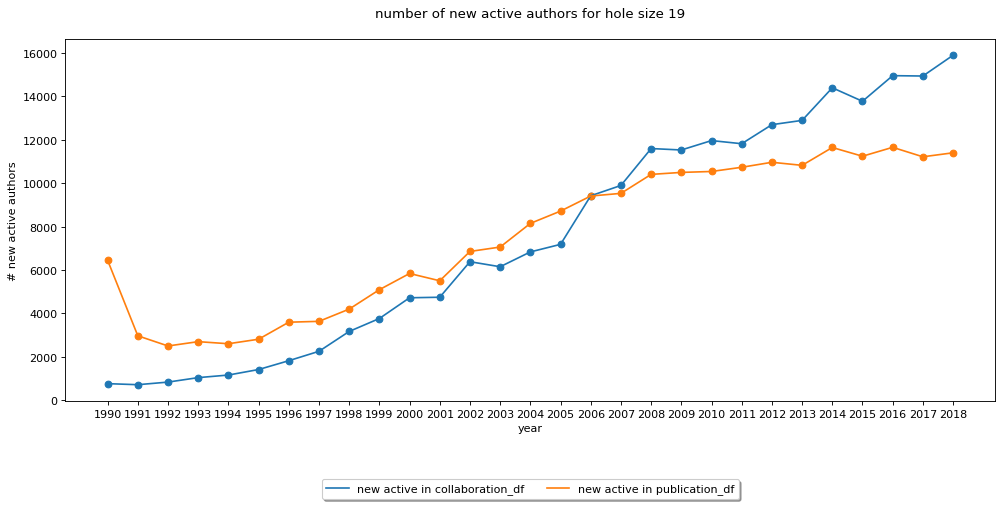

collaboration_df {'1990': '763', '1991': '715', '1992': '835', '1993': '1041', '1994': '1160', '1995': '1414', '1996': '1821', '1997': '2254', '1998': '3169', '1999': '3766', '2000': '4722', '2001': '4746', '2002': '6384', '2003': '6152', '2004': '6835', '2005': '7184', '2006': '9423', '2007': '9899', '2008': '11600', '2009': '11534', '2010': '11967', '2011': '11823', '2012': '12701', '2013': '12898', '2014': '14401', '2015': '13779', '2016': '14960', '2017': '14943', '2018': '15901'} 

publication_df {'1990': '6450', '1991': '2969', '1992': '2500', '1993': '2699', '1994': '2603', '1995': '2811', '1996': '3596', '1997': '3635', '1998': '4199', '1999': '5094', '2000': '5841', '2001': '5505', '2002': '6857', '2003': '7060', '2004': '8150', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
=================

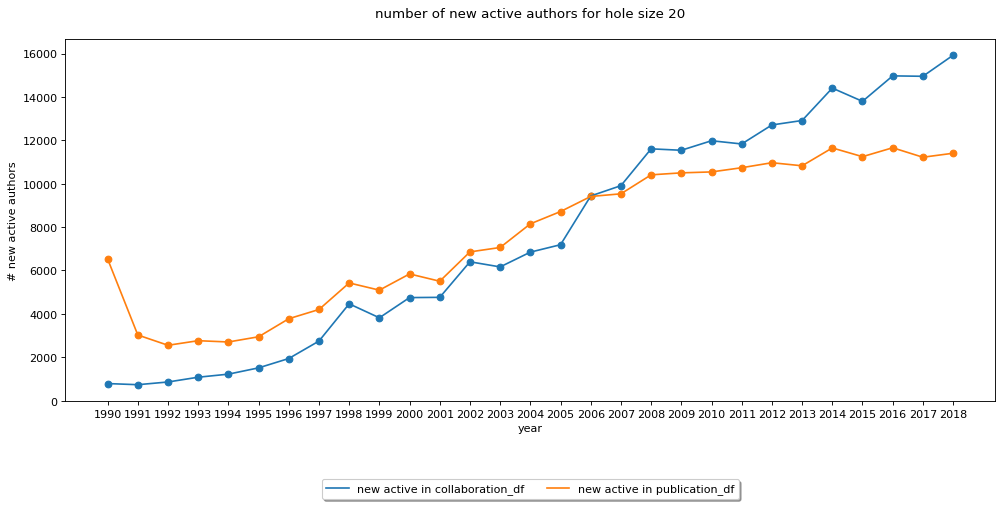

collaboration_df {'1990': '788', '1991': '736', '1992': '861', '1993': '1081', '1994': '1222', '1995': '1512', '1996': '1943', '1997': '2747', '1998': '4463', '1999': '3820', '2000': '4751', '2001': '4762', '2002': '6401', '2003': '6165', '2004': '6846', '2005': '7188', '2006': '9435', '2007': '9910', '2008': '11607', '2009': '11541', '2010': '11980', '2011': '11832', '2012': '12708', '2013': '12913', '2014': '14407', '2015': '13796', '2016': '14970', '2017': '14951', '2018': '15921'} 

publication_df {'1990': '6531', '1991': '3026', '1992': '2553', '1993': '2764', '1994': '2705', '1995': '2945', '1996': '3777', '1997': '4202', '1998': '5426', '1999': '5094', '2000': '5841', '2001': '5505', '2002': '6857', '2003': '7060', '2004': '8150', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
=================

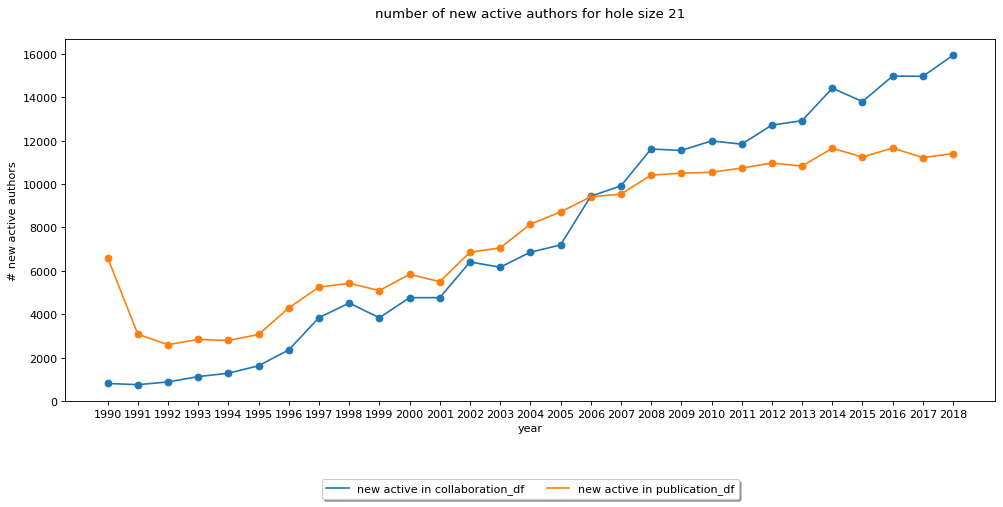

collaboration_df {'1990': '815', '1991': '758', '1992': '886', '1993': '1130', '1994': '1288', '1995': '1630', '1996': '2361', '1997': '3846', '1998': '4518', '1999': '3842', '2000': '4766', '2001': '4767', '2002': '6410', '2003': '6169', '2004': '6860', '2005': '7195', '2006': '9437', '2007': '9918', '2008': '11614', '2009': '11548', '2010': '11987', '2011': '11838', '2012': '12716', '2013': '12920', '2014': '14415', '2015': '13801', '2016': '14976', '2017': '14961', '2018': '15933'} 

publication_df {'1990': '6610', '1991': '3082', '1992': '2600', '1993': '2841', '1994': '2795', '1995': '3071', '1996': '4298', '1997': '5254', '1998': '5426', '1999': '5094', '2000': '5841', '2001': '5505', '2002': '6857', '2003': '7060', '2004': '8150', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
=================

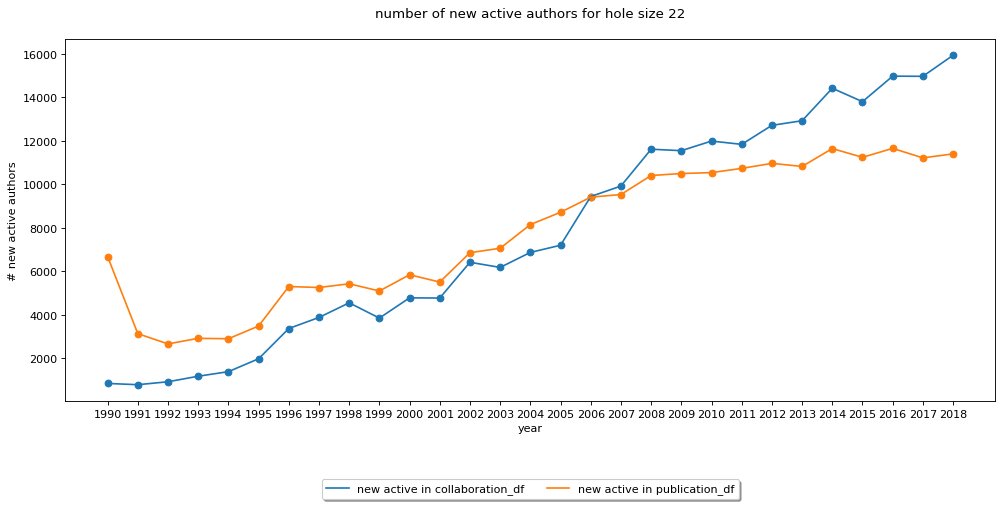

collaboration_df {'1990': '838', '1991': '781', '1992': '916', '1993': '1171', '1994': '1381', '1995': '1974', '1996': '3366', '1997': '3876', '1998': '4549', '1999': '3847', '2000': '4778', '2001': '4770', '2002': '6415', '2003': '6179', '2004': '6869', '2005': '7199', '2006': '9442', '2007': '9924', '2008': '11619', '2009': '11552', '2010': '11994', '2011': '11842', '2012': '12718', '2013': '12930', '2014': '14425', '2015': '13808', '2016': '14982', '2017': '14974', '2018': '15944'} 

publication_df {'1990': '6677', '1991': '3129', '1992': '2658', '1993': '2915', '1994': '2896', '1995': '3481', '1996': '5299', '1997': '5254', '1998': '5426', '1999': '5094', '2000': '5841', '2001': '5505', '2002': '6857', '2003': '7060', '2004': '8150', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
=================

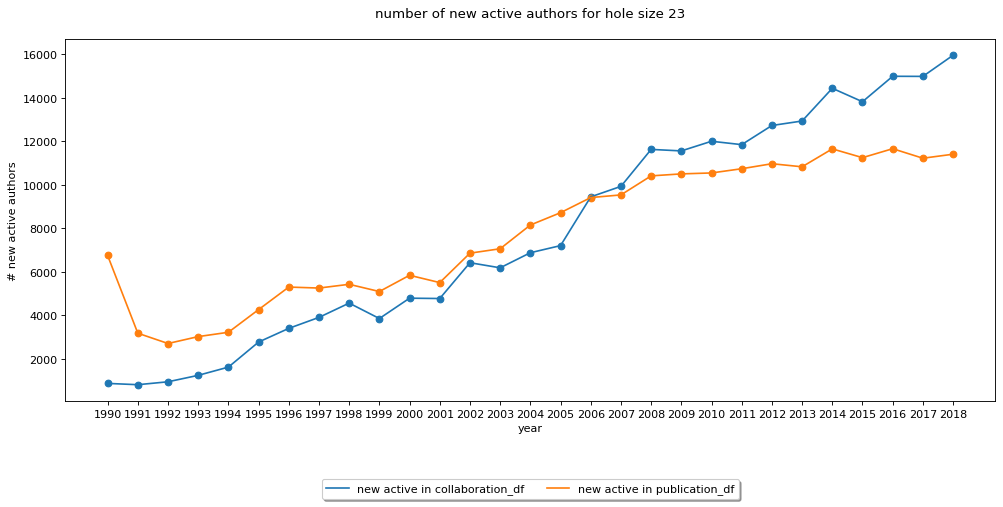

collaboration_df {'1990': '872', '1991': '813', '1992': '947', '1993': '1243', '1994': '1621', '1995': '2773', '1996': '3401', '1997': '3906', '1998': '4562', '1999': '3854', '2000': '4788', '2001': '4773', '2002': '6418', '2003': '6184', '2004': '6877', '2005': '7204', '2006': '9445', '2007': '9926', '2008': '11625', '2009': '11556', '2010': '11999', '2011': '11844', '2012': '12724', '2013': '12930', '2014': '14434', '2015': '13816', '2016': '14985', '2017': '14980', '2018': '15952'} 

publication_df {'1990': '6751', '1991': '3179', '1992': '2706', '1993': '3023', '1994': '3222', '1995': '4264', '1996': '5299', '1997': '5254', '1998': '5426', '1999': '5094', '2000': '5841', '2001': '5505', '2002': '6857', '2003': '7060', '2004': '8150', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
=================

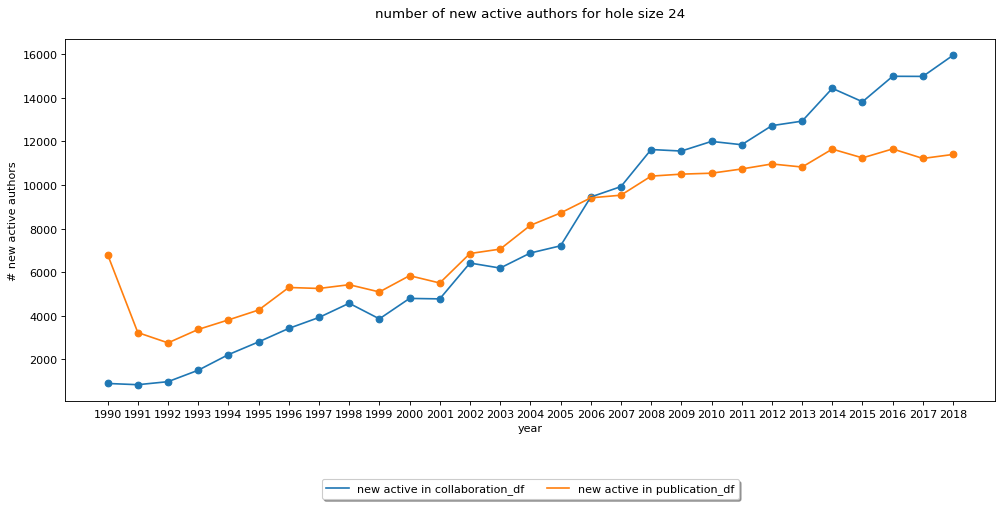

collaboration_df {'1990': '894', '1991': '838', '1992': '977', '1993': '1502', '1994': '2218', '1995': '2802', '1996': '3421', '1997': '3923', '1998': '4575', '1999': '3859', '2000': '4797', '2001': '4776', '2002': '6421', '2003': '6190', '2004': '6881', '2005': '7211', '2006': '9450', '2007': '9928', '2008': '11629', '2009': '11560', '2010': '12002', '2011': '11850', '2012': '12726', '2013': '12932', '2014': '14438', '2015': '13822', '2016': '14990', '2017': '14985', '2018': '15956'} 

publication_df {'1990': '6809', '1991': '3230', '1992': '2758', '1993': '3374', '1994': '3811', '1995': '4264', '1996': '5299', '1997': '5254', '1998': '5426', '1999': '5094', '2000': '5841', '2001': '5505', '2002': '6857', '2003': '7060', '2004': '8150', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
=================

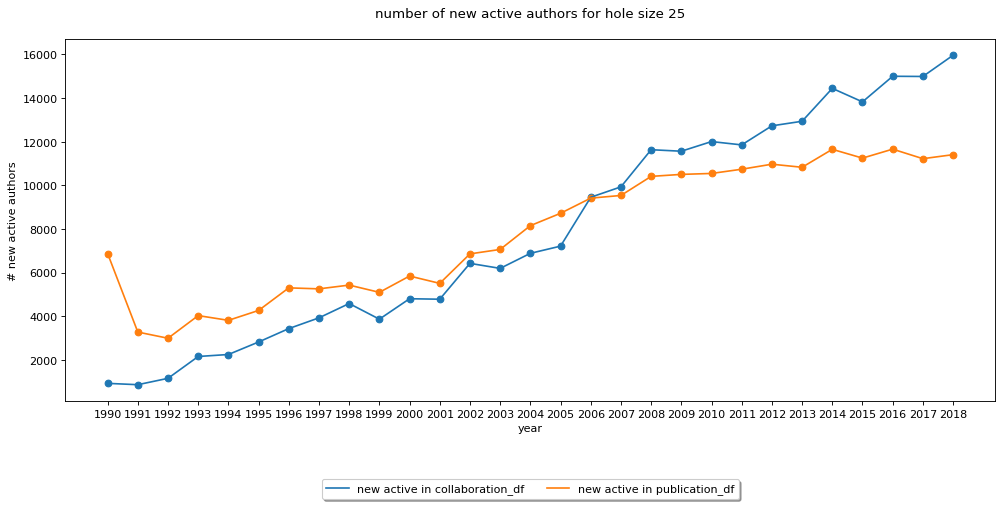

collaboration_df {'1990': '922', '1991': '861', '1992': '1153', '1993': '2154', '1994': '2245', '1995': '2818', '1996': '3432', '1997': '3925', '1998': '4581', '1999': '3864', '2000': '4801', '2001': '4779', '2002': '6422', '2003': '6192', '2004': '6882', '2005': '7212', '2006': '9452', '2007': '9929', '2008': '11631', '2009': '11562', '2010': '12004', '2011': '11852', '2012': '12726', '2013': '12935', '2014': '14443', '2015': '13824', '2016': '14997', '2017': '14988', '2018': '15961'} 

publication_df {'1990': '6874', '1991': '3273', '1992': '2990', '1993': '4028', '1994': '3811', '1995': '4264', '1996': '5299', '1997': '5254', '1998': '5426', '1999': '5094', '2000': '5841', '2001': '5505', '2002': '6857', '2003': '7060', '2004': '8150', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
================

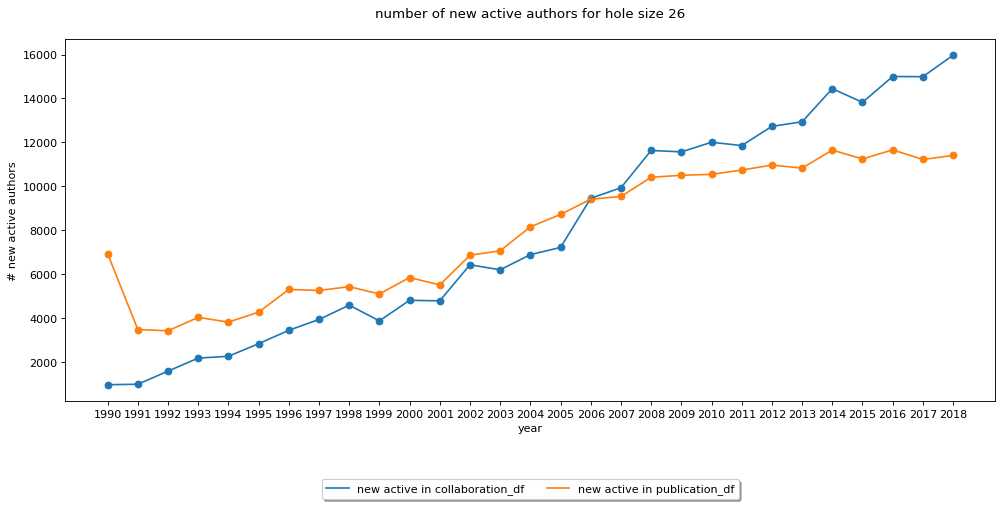

collaboration_df {'1990': '960', '1991': '980', '1992': '1578', '1993': '2172', '1994': '2254', '1995': '2827', '1996': '3438', '1997': '3931', '1998': '4583', '1999': '3867', '2000': '4804', '2001': '4781', '2002': '6424', '2003': '6194', '2004': '6885', '2005': '7214', '2006': '9452', '2007': '9931', '2008': '11631', '2009': '11567', '2010': '12004', '2011': '11855', '2012': '12729', '2013': '12938', '2014': '14445', '2015': '13825', '2016': '14999', '2017': '14993', '2018': '15969'} 

publication_df {'1990': '6930', '1991': '3474', '1992': '3416', '1993': '4028', '1994': '3811', '1995': '4264', '1996': '5299', '1997': '5254', '1998': '5426', '1999': '5094', '2000': '5841', '2001': '5505', '2002': '6857', '2003': '7060', '2004': '8150', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
================

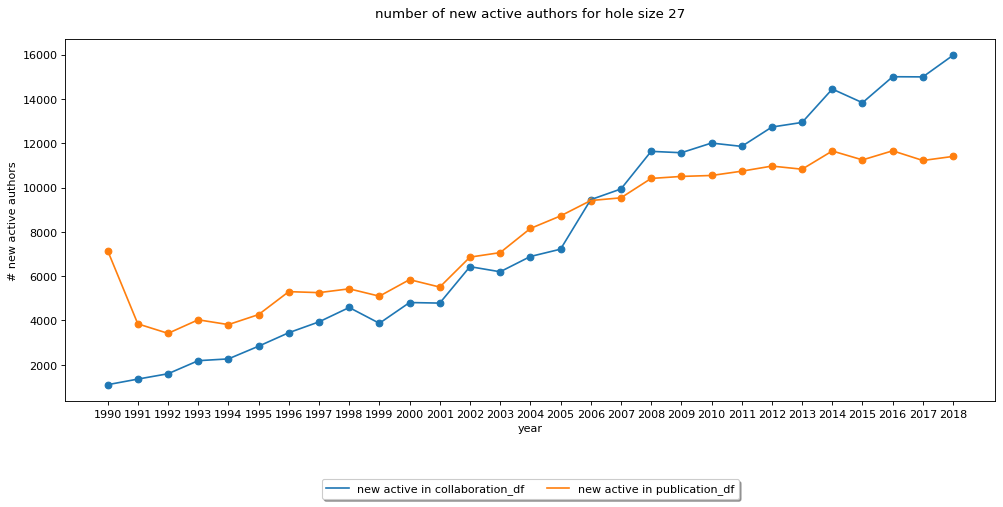

collaboration_df {'1990': '1098', '1991': '1351', '1992': '1592', '1993': '2182', '1994': '2263', '1995': '2836', '1996': '3445', '1997': '3934', '1998': '4583', '1999': '3870', '2000': '4807', '2001': '4782', '2002': '6427', '2003': '6196', '2004': '6885', '2005': '7216', '2006': '9452', '2007': '9933', '2008': '11632', '2009': '11570', '2010': '12007', '2011': '11856', '2012': '12730', '2013': '12938', '2014': '14445', '2015': '13828', '2016': '15001', '2017': '14994', '2018': '15971'} 

publication_df {'1990': '7154', '1991': '3844', '1992': '3416', '1993': '4028', '1994': '3811', '1995': '4264', '1996': '5299', '1997': '5254', '1998': '5426', '1999': '5094', '2000': '5841', '2001': '5505', '2002': '6857', '2003': '7060', '2004': '8150', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}
==============

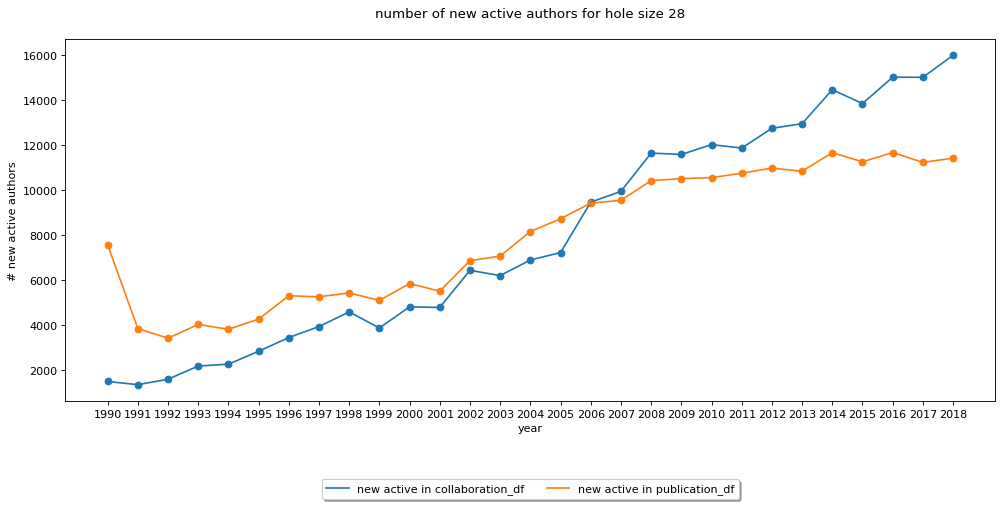

collaboration_df {'1990': '1497', '1991': '1353', '1992': '1595', '1993': '2182', '1994': '2263', '1995': '2836', '1996': '3445', '1997': '3934', '1998': '4583', '1999': '3870', '2000': '4807', '2001': '4782', '2002': '6427', '2003': '6197', '2004': '6886', '2005': '7216', '2006': '9453', '2007': '9933', '2008': '11632', '2009': '11570', '2010': '12007', '2011': '11856', '2012': '12730', '2013': '12938', '2014': '14445', '2015': '13828', '2016': '15001', '2017': '14994', '2018': '15974'} 

publication_df {'1990': '7564', '1991': '3844', '1992': '3416', '1993': '4028', '1994': '3811', '1995': '4264', '1996': '5299', '1997': '5254', '1998': '5426', '1999': '5094', '2000': '5841', '2001': '5505', '2002': '6857', '2003': '7060', '2004': '8150', '2005': '8717', '2006': '9412', '2007': '9534', '2008': '10409', '2009': '10500', '2010': '10543', '2011': '10737', '2012': '10967', '2013': '10826', '2014': '11649', '2015': '11246', '2016': '11657', '2017': '11220', '2018': '11404'}


In [4]:
min_size = 0
max_size = 28
YEARS = [str(year) for year in range(1990,2019)]  

# read number of active authors for each hole size, and for each year


for size in range(min_size, max_size+1):
    print((' \033[1m' + "HOLE SIZE "+str(size) + '\033[0m ').center(150, '='))
    plt.figure(figsize=(15, 6), dpi=80)
    plt.xlabel("year")
    plt.ylabel("# new active authors")
    plt.title("number of new active authors for hole size " + str(size) + "\n", fontdict = {'fontsize' : 12})
    
    path = 'myDATA/05-filtered_by_hole_size/filtered_by_hole_size_'+str(size)+'.csv'
    legend = {}
    legend1 = {}
    y_axis = []
    y_axis1 = []
    
    if os.path.exists(path):
        collabs_df = pd.read_csv(path)
        pubb_df = pd.read_csv("myDATA/02-publication_df.csv")
        pubb_df = pubb_df[pubb_df.ID.isin(collabs_df["ID"])]

        for year in YEARS:    
            n_not_new = len(collabs_df)
            collabs_df = collabs_df.loc[collabs_df[year] == 0]
            y_axis.append(n_not_new - len(collabs_df))
            legend[year] = str(n_not_new - len(collabs_df))
            
            n_not_new1 = len(pubb_df)
            pubb_df = pubb_df.loc[pubb_df[year] == 0]
            y_axis1.append(n_not_new1 - len(pubb_df))
            legend1[year] = str(n_not_new1 - len(pubb_df))
    
        #print(YEARS,"\n",y_axis,"\n", legend)

        plt.plot(YEARS,y_axis)
        plt.scatter(YEARS, y_axis)
        
        plt.plot(YEARS,y_axis1)
        plt.scatter(YEARS, y_axis1)
        
        plt.legend(["new active in collaboration_df", "new active in publication_df"],loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=5)
        
        plt.savefig('myDATA/05-filtered_by_hole_size/'+ str(size) + '_hole_size_new_active_distribution ')
        plt.show()
        print("collaboration_df", legend, "\n")
        print("publication_df", legend1)    